In [1]:
!pip install PySCeS
!pip install stochpy

You should consider upgrading via the '/home/user/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/user/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
import stochpy


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

In [2]:
def doSequentialSim(smod,n_generations,cell_division_times):    
    for i in range(1,n_generations):     
        ### divide each species between two daughter cells ###        
        for j in range(0,len(smod.data_stochsim.species_labels)): 
            species_amount = smod.SSA.sim_output[-2][1:][j]     
            if species_amount:
                smod.settings.X_matrix[j] = np.random.binomial(n=species_amount
                                                               ,p=0.5,size=1)                
        ### replace last time point with species amounts after division ###
        species_after_division = copy.deepcopy(list(smod.settings.X_matrix))
        species_after_division.insert(0,cell_division_times[0:i].sum())
        species_after_division.append(np.NAN) # no reaction occurred at cell division
        smod.SSA.sim_output[-1] = copy.deepcopy(species_after_division)                         
        ### Set settings for new simulation and simulate the next generation ### 
        smod.settings.starttime = copy.deepcopy(smod.SSA.sim_output[-1][0])
        smod.settings.endtime = smod.settings.starttime + cell_division_times[i]
        smod.SSA.Execute(smod.settings,False) # do stochastic simulation     
    smod.FillDataStochsim() # add all data to data_stochsim object

In [3]:
import stochpy, numpy as np,copy,os,matplotlib.gridspec as gridspec
import matplotlib as plt
plt.rcParams.update({'figure.max_open_warning': 0})
smod = stochpy.SSA(model_file='DBDfinal.psc',dir='/home/user/Documents/iGem2020Uppsala/python_scripts/stochpy/')
T_GENERATION = 3600

In [ ]:
### 2: Do long simulation for probability density function of protein copy numbers ###
N_GENERATIONS = 100
CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=10)
doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
smod.PlotSpeciesTimeSeries(species2plot=['dimercaff'])
smod.PlotSpeciesTimeSeries(species2plot=['dimerpromoter'])
smod.PlotSpeciesTimeSeries(species2plot=['mRNA'])
smod.PlotSpeciesTimeSeries(species2plot=['Protein'])
smod.PlotSpeciesTimeSeries(species2plot=['MatureProtein'])

In [ ]:
### 1: Do short looping simulations for a time series plot ###
kdimerization = [3,6,9]
kActivate = [1,5,10]
kDNAbinding = [25,50,75]
for i in kdimerization:
  for j in kActivate:
    for k in kDNAbinding:
      print('simulation with kdimerization, kActivate, kDNAbinding =',i,', ',j,', ',k)
      graphtitle = str('simulation with kdimerization, kActivate, kDNAbinding ='+str(i)+' '+str(j)+' '+str(k))
      smod.ChangeParameter('kdimerization',i)
      smod.ChangeParameter('kActivate',j)
      smod.ChangeParameter('kDNAbinding',k)
      N_GENERATIONS = 100
      CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
      smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=10)
      doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
      smod.PlotSpeciesTimeSeries(species2plot=['mRNA'],title=graphtitle)
      smod.PlotSpeciesTimeSeries(species2plot=['MatureProtein'],title=graphtitle)
      print('done')

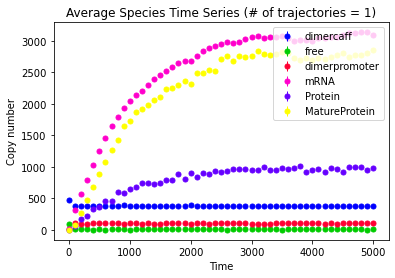

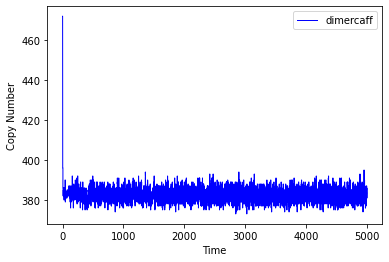

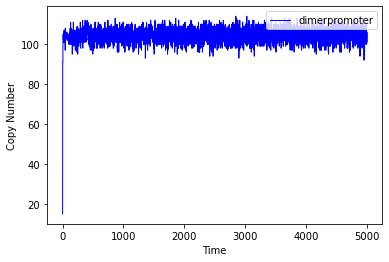

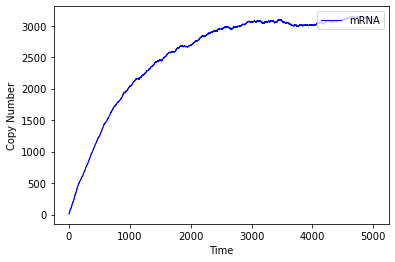

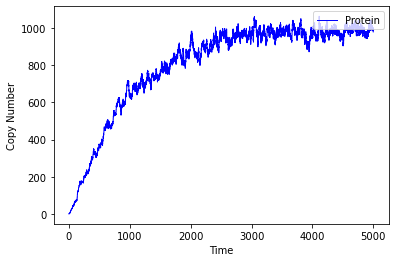

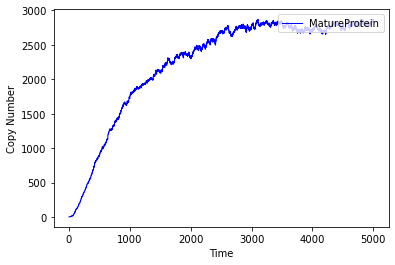

In [7]:
### Test a model with a time event
smod.Model('DBDfinal.psc') 
smod.DoStochSim(trajectories=1,end=5000,mode='time')
smod.GetRegularGrid()
smod.PlotAverageSpeciesTimeSeries()
smod.PlotSpeciesTimeSeries(species2plot=['dimercaff'])
smod.PlotSpeciesTimeSeries(species2plot=['dimerpromoter'])
smod.PlotSpeciesTimeSeries(species2plot=['mRNA'])
smod.PlotSpeciesTimeSeries(species2plot=['Protein'])
smod.PlotSpeciesTimeSeries(species2plot=['MatureProtein'])

In [8]:
pwd

'/Users/sebastianmoes/Documents/GitHub/iGem2020Uppsala/python_scripts/stochpy'